In [239]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
# Loading data
data_no_onehot = pd.read_csv('../data/all.csv')
data_onehot = pd.read_csv('../data/all_with_onehot.csv')

In [241]:
data_onehot.head()

,Date,Weekday,MealType,Paytm+Cash,Coupons,SemType,Holiday,CouponsMand,Ajwain Parantha,Aloo Sabzi,...,Kathal,Arvi,Mango,Paneer Lababdar,Seasonal Vegetable (Karela),Dhuli Urad Dal,Aloo Kasoori Methi,Nutrela Peas,Palak Soya,Lauki Chana
0,2022-09-01,3,BreakFast,186.0,117.0,Acad,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-01,3,Lunch,293.0,217.0,Acad,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-01,3,EveningSnacks,37.0,139.0,Acad,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-01,3,Dinner,113.0,220.0,Acad,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-02,4,BreakFast,100.0,236.0,Acad,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_2107/1151409987.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_onehot.iloc[:, cols[x]], ax=ax[i, j])
/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_2107/1151409987.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

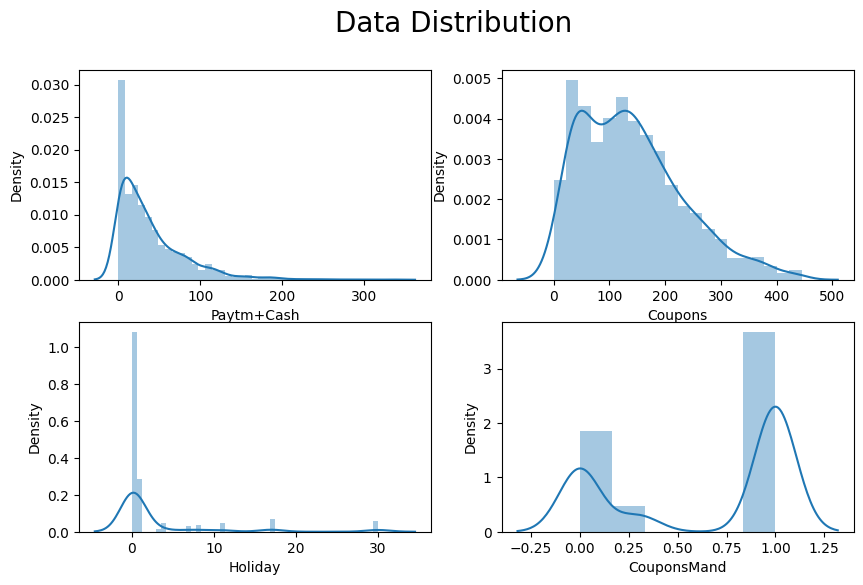

In [242]:
# # 1. Data Visualization
# First, we will visualize the data to get a better understanding of the data.

# ## 1.1. Data Distribution
# We will first look at the distribution of the data. We will plot the distribution of the data for each column.

# ### 1.1.1. Data Distribution (No One-Hot Encoding)
# We will first look at the distribution of the data for the dataset without one-hot encoding.

# Plotting the distribution of the data for each column
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Data Distribution', fontsize=20)
cols = [3, 4, 6, 7]
x = 0
for i in range(2):
    for j in range(2):
        # if i*2 + j in [3, 4, 6, 7]:
        sns.distplot(data_no_onehot.iloc[:, cols[x]], ax=ax[i, j])
        x+=1

import os
if not os.path.exists('../img'):
    os.makedirs('../img')
plt.savefig('../img/data_distribution_no_onehot.png')


/var/folders/4d/w8t5vd_11zs7s9jlct5ksrfr0000gn/T/ipykernel_2107/629044267.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_no_onehot.corr(), annot=True)


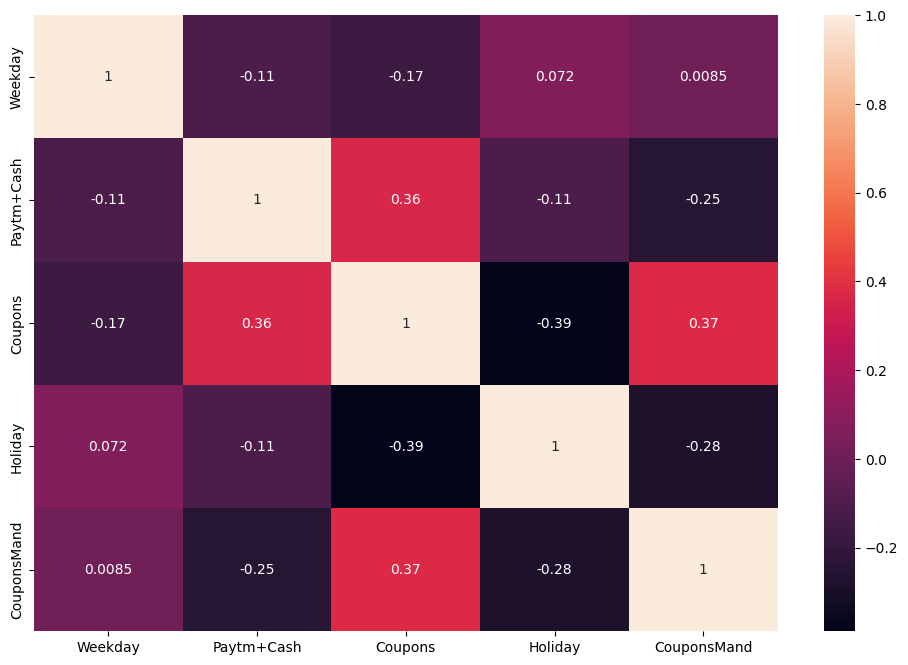

In [243]:
# # 1.1 Heatmap
# We will now plot a heatmap to see the correlation between the features.

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_no_onehot.corr(), annot=True)
plt.savefig('../img/heatmap_no_onehot.png')


In [244]:
import matplotlib.dates as mdates
def plot_data(xdata, ydata, title, xlabel, ylabel):
    plt.figure(figsize=(6, 4))
    plt.plot(xdata, ydata)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # use concise date ticks
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    # ax.xaxis.set_major_formatter(
    # mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
    # ax.xaxis.set_major_locator(mdates.YearLocator())
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # plt.savefig('../img/' + title + '.png')

    plt.show()

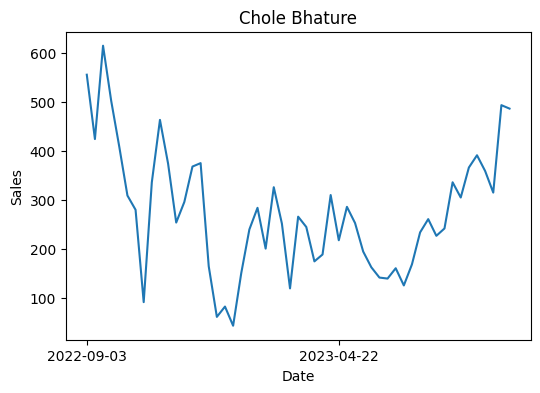

In [245]:
# get the line graph of paytm+cash for Rajma
big_df = data_onehot
item = "Matar Kulcha"
item = "Chole Bhature"
vis_df = big_df.loc[big_df[item] > 0]
vis_df.loc[:, ["Date", "Weekday", item]]
plot_data(vis_df['Date'], vis_df['Paytm+Cash']+vis_df['Coupons'], item, 'Date', 'Sales')

# plt.figure(figsize=(12, 8))
# sns.lineplot(x=data_onehot['Date'], y=data_onehot['Paytm+Cash']+data_onehot['Coupons'])

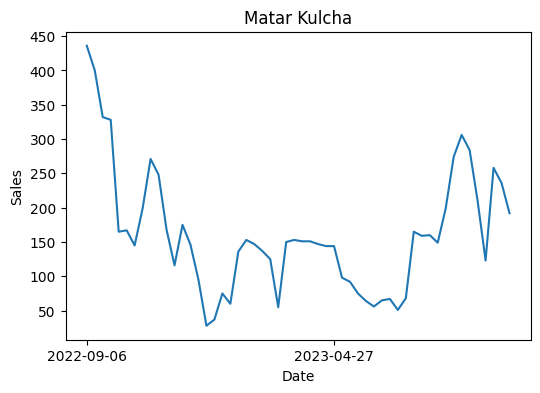

In [246]:
item = "Matar Kulcha"
vis_df = big_df.loc[big_df[item] > 0]
vis_df.loc[:, ["Date", "Weekday", item]]
plot_data(vis_df['Date'], vis_df['Paytm+Cash']+vis_df['Coupons'], item, 'Date', 'Sales')

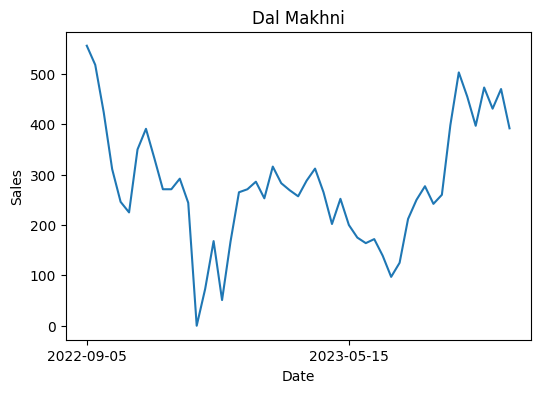

In [247]:
item = "Dal Makhni"
vis_df = big_df.loc[big_df[item] > 0]
vis_df.loc[:, ["Date", "Weekday", item]]
plot_data(vis_df['Date'], vis_df['Paytm+Cash']+vis_df['Coupons'], item, 'Date', 'Sales')